In [1]:
from ipyniivue import AnyNiivue, SliceType
import pandas as pd
from IPython.display import display, clear_output
import time
import os

# volumes = [
#     {
#         "path": f"../../data/atlas/MNI152_T1_1mm_brain_white_mask_int.nii.gz",
#         "colormap": "grey",
#     },
# ]
# nv = AnyNiivue(
#     back_color=(1, 1, 1, 1),
#     show_3D_crosshair=True,
#     is_colorbar=True,
# )
# nv.load_volumes(volumes)
# display(nv)

In [35]:
base = '../../result_ibf_2full+mirror_TT/nii_abagen'
file_list = os.listdir(base)
file_list.sort()
path = [os.path.join(base, file) for file in file_list][0]
# print(file_list)

# for path in file_list:
volumes = [
    {
        # "path": f"../../result_ibf_2full+mirror_TT/nii_{donor}_{matter}/{path}.nii.gz",
        "path": path,
        "colormap": "copper2",
    },
]
nv = AnyNiivue(
    back_color=(1, 1, 1, 1),
    show_3D_crosshair=True,
    is_colorbar=True,
)
nv.load_volumes(volumes)

clear_output(wait=True)
display(nv)
time.sleep(4)


AnyNiivue()

In [52]:
gene_list = [file.split('/')[-1].split('_')[0] for file in file_list]
x_labels = gene_list[0:8]
x_labels

['ABCA1', 'ABCA7', 'ADAM17', 'ADAMTS1', 'ANK3', 'ANKH', 'APH1B', 'APOE']

9 8 8
24


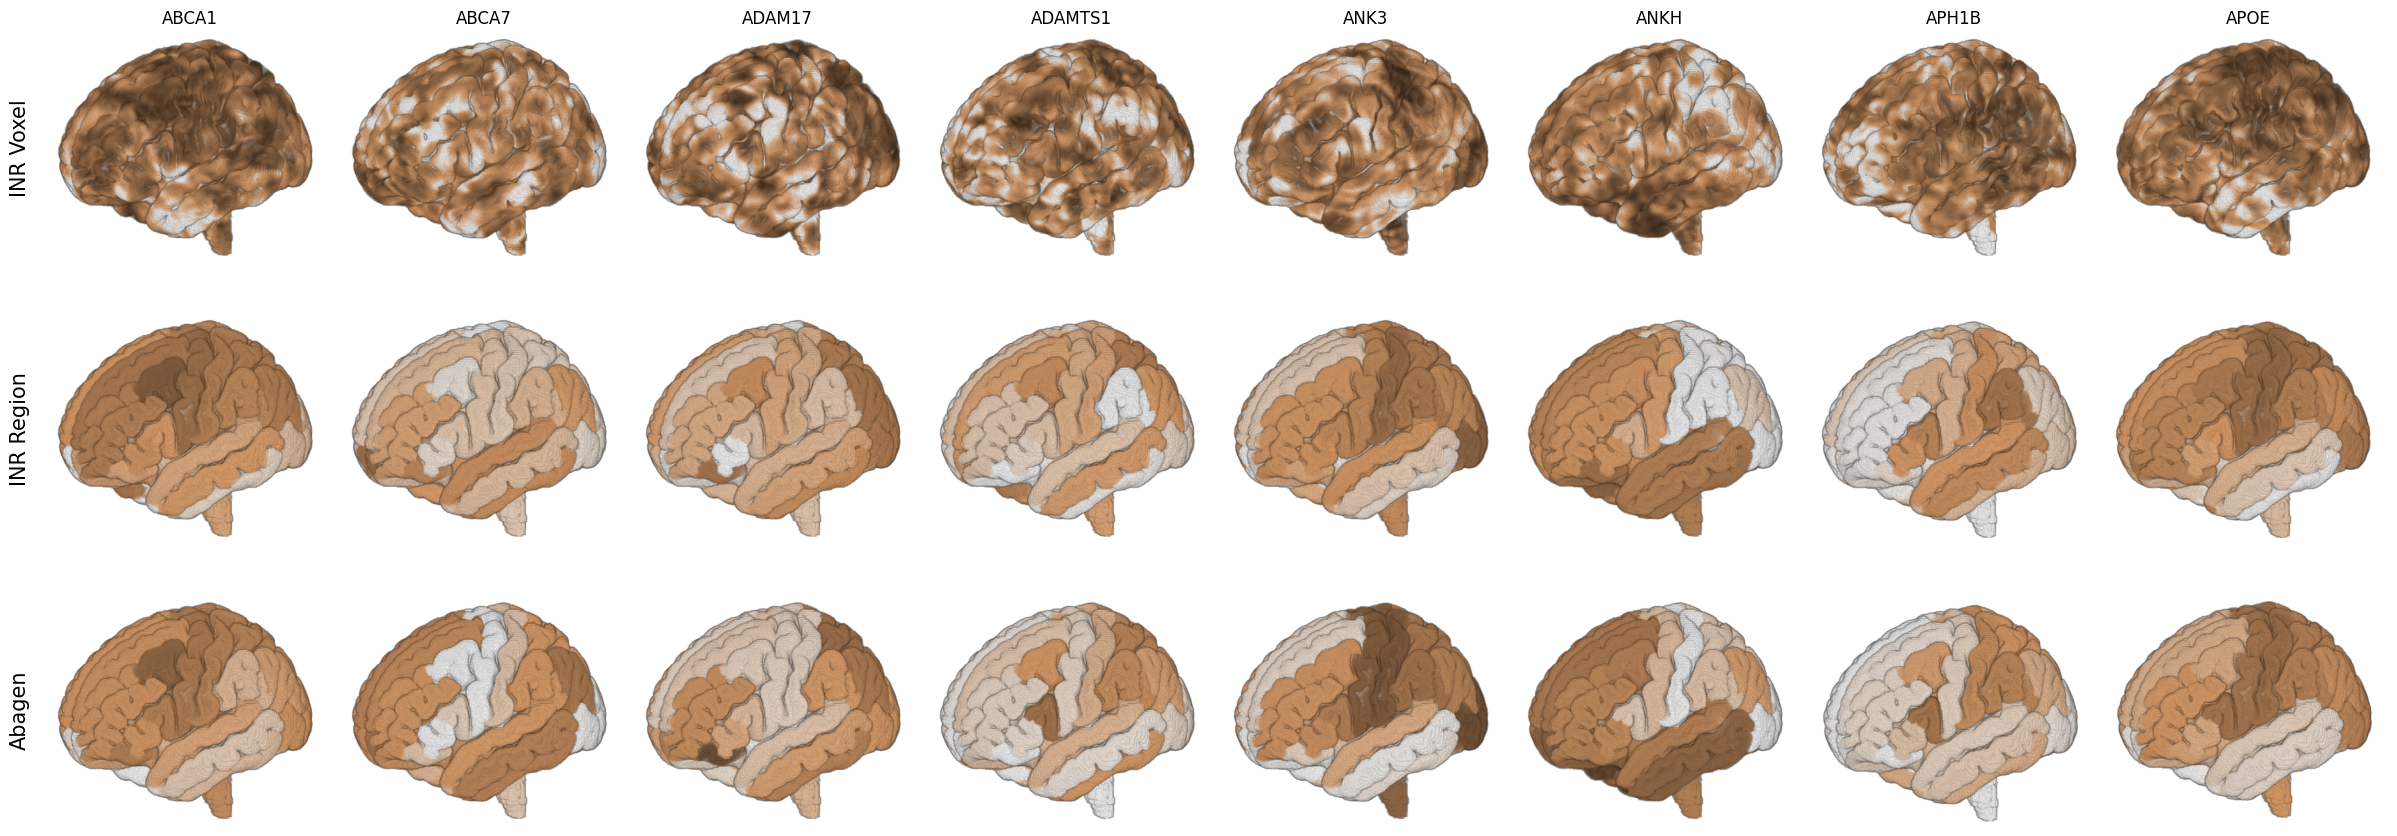

In [76]:
def get_file_list(base):
    file_list = os.listdir(base)
    file_list.sort()
    paths = [os.path.join(base, file) for file in file_list]
    return file_list, paths

base1 = '../../results/imgs0-7/inrs'
base2 = '../../results/imgs0-7/inravg'
base3 = '../../results/imgs0-7/abagen'

file_list1, paths1 = get_file_list(base1)
file_list2, paths2 = get_file_list(base2)
file_list3, paths3 = get_file_list(base3)
print(len(paths1), len(paths2), len(paths3))
paths1 = paths1[1:]
paths1.extend(paths2)
paths1.extend(paths3)
images = paths1
print(len(images))

y_labels = ['INR Voxel', 'INR Region', 'Abagen']


import matplotlib.pyplot as plt
import matplotlib.image as mpimg


fig, axs = plt.subplots(3, 8, figsize=(24, 9)) 
# Load and display each image
for i, ax in enumerate(axs.flat):
    if i < len(images):
        img = mpimg.imread(images[i])
        ax.imshow(img)
    ax.axis('off')  # Turn off axis

# Set the labels for the columns
for ax, label in zip(axs[0], x_labels):
    ax.set_title(label)
    
# Manually set the labels for the rows
for i, ax in enumerate(axs[:,0]):
    ax.text(-0.07, 0.5, y_labels[i], transform=ax.transAxes, ha='right', va='center', fontsize=15, rotation=90)
    
plt.tight_layout(pad=1.0)
plt.show()
fig.savefig('../../results/glassbrain.png', dpi=300)


In [ ]:
import os

images = os.listdir("../../results/screenshots/")
images.sort()

for i, row in df.iterrows():
    if i < start:
        continue
    if i >= end:
        break
    id = row['gene_symbol']
    
    if full_records:
        path = f"{id}_{matter}_inrs"
    else:
        path = f"{id}_{matter}_inr"
        
    if avg:
        path = f"{path}_avg"
        
    if abagen:
        path = f"{id}_{matter}_abagen"
        
    # rename image
    out_base = "../../results/imgs_inrs_avg"
    os.makedirs(out_base, exist_ok=True)
    input_path = f"../../results/screenshots/{images[i]}"
    output_path = f"{out_base}/{i}_{path}.png"
    os.rename(input_path, output_path)
    print(f"Renamed {input_path} -> {output_path}")


Renamed ../../results/screenshots/Screenshot 2024-04-29 at 2.39.38 PM.png -> ../../results/screenshots_res/0_PRKD3_246_inrs_avg.png
Renamed ../../results/screenshots/Screenshot 2024-04-29 at 2.39.42 PM.png -> ../../results/screenshots_res/1_PICALM_246_inrs_avg.png
Renamed ../../results/screenshots/Screenshot 2024-04-29 at 2.39.45 PM.png -> ../../results/screenshots_res/2_DNAJB4_246_inrs_avg.png
Renamed ../../results/screenshots/Screenshot 2024-04-29 at 2.39.49 PM.png -> ../../results/screenshots_res/3_HBP1_246_inrs_avg.png
Renamed ../../results/screenshots/Screenshot 2024-04-29 at 2.39.53 PM.png -> ../../results/screenshots_res/4_FBXL7_246_inrs_avg.png
Renamed ../../results/screenshots/Screenshot 2024-04-29 at 2.39.58 PM.png -> ../../results/screenshots_res/5_SNX1_246_inrs_avg.png
Renamed ../../results/screenshots/Screenshot 2024-04-29 at 2.40.01 PM.png -> ../../results/screenshots_res/6_FERMT2_246_inrs_avg.png
Renamed ../../results/screenshots/Screenshot 2024-04-29 at 2.40.05 PM.png -

In [ ]:
# generate a gif from the images
import imageio

out_base = "../../results/imgs_inrs_avg"
images = os.listdir(out_base)
images = sorted(images, key=lambda x: int(x.split("/")[-1].split("_")[0]))
images = [f"{out_base}/{img}" for img in images]
print(images)

gif_path = f"../../results/inrs_avg.gif"
images = [imageio.imread(img) for img in images]
imageio.mimsave(gif_path, images, duration=1)


['../../results/imgs_inrs_avg/0_PRKD3_246_inrs_avg.png', '../../results/imgs_inrs_avg/1_PICALM_246_inrs_avg.png', '../../results/imgs_inrs_avg/2_DNAJB4_246_inrs_avg.png', '../../results/imgs_inrs_avg/3_HBP1_246_inrs_avg.png', '../../results/imgs_inrs_avg/4_FBXL7_246_inrs_avg.png', '../../results/imgs_inrs_avg/5_SNX1_246_inrs_avg.png', '../../results/imgs_inrs_avg/5_SNX1_246_abagen.png', '../../results/imgs_inrs_avg/6_FERMT2_246_abagen.png', '../../results/imgs_inrs_avg/6_FERMT2_246_inrs_avg.png', '../../results/imgs_inrs_avg/7_REST_246_abagen.png', '../../results/imgs_inrs_avg/7_REST_246_inrs_avg.png', '../../results/imgs_inrs_avg/8_USP6NL_246_inrs_avg.png', '../../results/imgs_inrs_avg/8_USP6NL_246_abagen.png', '../../results/imgs_inrs_avg/9_APH1B_246_inrs_avg.png', '../../results/imgs_inrs_avg/9_APH1B_246_abagen.png', '../../results/imgs_inrs_avg/10_NEAT1_246_inrs_avg.png', '../../results/imgs_inrs_avg/11_MINDY2_246_inrs_avg.png', '../../results/imgs_inrs_avg/12_APP_246_inrs_avg.png'

/tmp/ipykernel_540197/1916986801.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(img) for img in images]
